# Binning by IDACI and FSM

Here we attempt to evaluate activity among certain subgroups of the population. 

## Load the data 

Load the data 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import stats_helper_files as stat


# Inputs
external_csv = r"/home/andris/GitHub/data/school_ext_data.csv"
internal_csv = r"/home/andris/GitHub/data/school_clk_data.csv"

In [55]:
# ------------------------------------------------------
# JOIN EXTERNAL DATA WITH CLICKSTREAM DATA
# ------------------------------------------------------

# Read external data (indices and exam results)
df_ext = pd.read_csv(external_csv)
print('Total number of schools in external spreadsheet:',len(df_ext))

# Read internal data (clickstream data)
df_int = pd.read_csv(internal_csv)
print('Total number of schools in internal spreadsheet:',len(df_int))

# Combine the 2 dataframes
df_ext['URN'] = df_ext['URN'].astype('str') 
df = df_ext.set_index('URN').join(df_int.set_index('school_id'))
print('Number of schools after joining:',len(df))

#  All clickstream data that is not defined is set to 0
df = df.fillna(0)

# Select the schools that have provide all science courses in all years
df = df[(df.filter(regex='Entries') > 0).all(axis=1)]
print('Number of schools that had all science courses:',len(df))


Total number of schools in external spreadsheet: 2776
Total number of schools in internal spreadsheet: 1238
Number of schools after joining: 2776
Number of schools that had all science courses: 899


In [56]:
# ------------------------------------------------------
# ADDING NEW FEATURES AND INDICES
# ------------------------------------------------------

# Computing improvement in exam scores

qu = ['Biology','Mathematics','Chemistry','Physics']

# Defining it relative to the mean

for item in qu:
    df['exam_improv_2013-2014_' + item] = (df['exam_score|2014_'+item] - df['exam_score|2013_'+item]) - (df['exam_score|2014_'+item] - df['exam_score|2013_'+item]).mean()

for item in qu:
    df['exam_improv_2013-2016_' + item] = (df['exam_score|2016_'+item] - df['exam_score|2013_'+item]) - (df['exam_score|2016_'+item] - df['exam_score|2013_'+item]).mean()

# Student activity
df['std_q_cor'] =  (df.filter(regex='_cor_std').sum(axis=1)/df['Entries|2016_Physics']).fillna(0)
df['std_ratio'] =  (df['user_id_std']/df['Entries|2016_Physics']).fillna(0) 

# Trying a combination
df['combo'] = (df['std_q_cor']/df['std_q_cor'].mean()) + (df['std_ratio']/df['std_ratio'].mean())

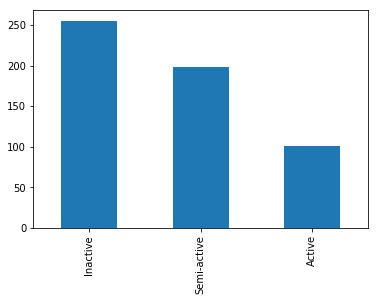

In [64]:
# Let's bin each school according to their activity on IP


bins = [-0.1, 0, 2,10000]
group_names = ['Inactive','Semi-active','Active']

df['categories'] = stat.bin_groups(df,'combo',bins,group_names)

# Plot a histogram
df['categories'].value_counts().plot(kind='bar')
plt.savefig('distribution.png', format='png', dpi=300)


In [65]:
# Let's first remove the schools that have a FSM of 0% because, it is unreliable

df = df[df['PercentageFSM'] >0]

print('Number of remaining schools:',len(df))

# Bin into identical categories
N_categories = 3;
labels = ['Low','Medium','High']

df['FSM_group'], bins = pd.qcut(df['PercentageFSM'], N_categories, labels = labels, retbins = True)

print(bins)

Number of remaining schools: 554
[  0.3   3.9   7.4  44.1]


In [82]:
# Let's plot the distribution

df4=df.groupby(['age','response']).size()
df4=df4.unstack()
df4.plot(kind='bar')

TypeError: Empty 'DataFrame': no numeric data to plot

Exam improvement between Low, Medium and High FSM groups of those schools that are inactive


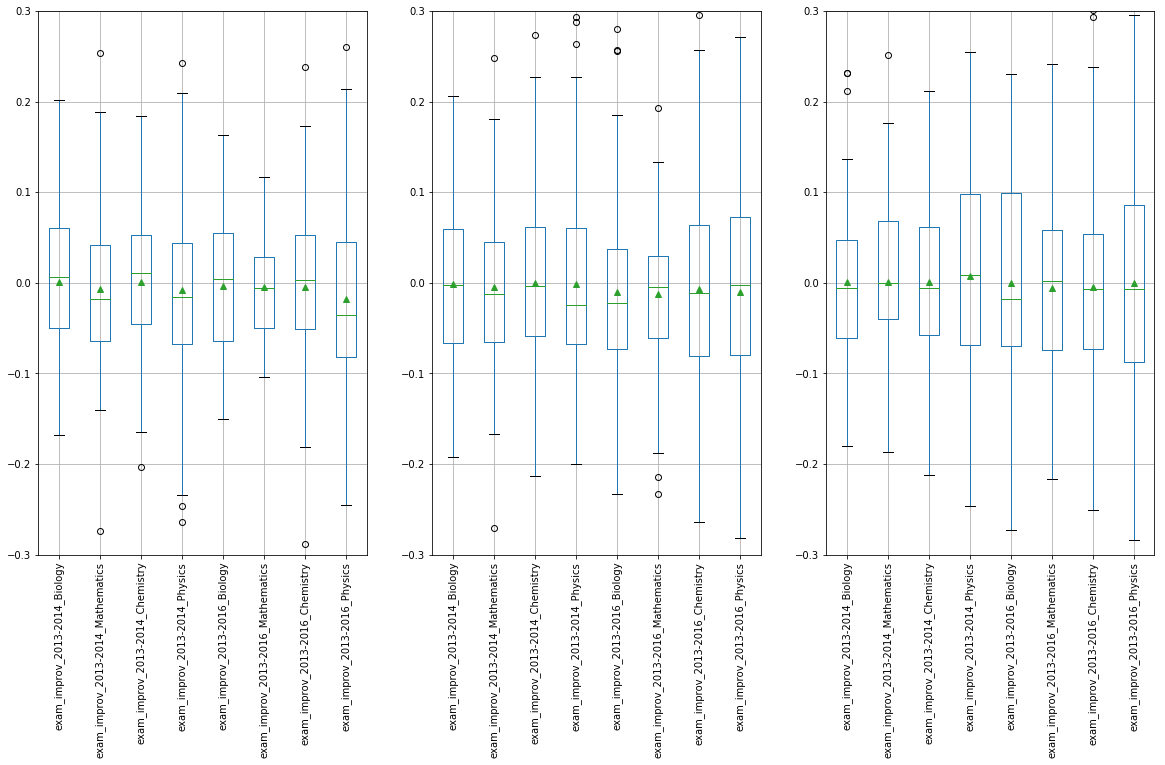

In [66]:
df_plot = df[df['categories'] == 'Inactive']

_, axs = plt.subplots(1,3,figsize=(20,10),sharey=True)

plt.subplot(1,3,1)
df_plot[df_plot['FSM_group']=='Low'].filter(regex='exam_improv').boxplot(rot=90, showmeans=True).set_ylim(-0.3,0.3)
plt.subplot(1,3,2)
df_plot[df_plot['FSM_group']=='Medium'].filter(regex='exam_improv').boxplot(rot=90, showmeans=True).set_ylim(-0.3,0.3)
plt.subplot(1,3,3)
df_plot[df_plot['FSM_group']=='High'].filter(regex='exam_improv').boxplot(rot=90, showmeans=True).set_ylim(-0.3,0.3)

print('Exam improvement between Low, Medium and High FSM groups of those schools that are inactive')



Exam improvement between Low, Medium and High FSM groups of those that are active


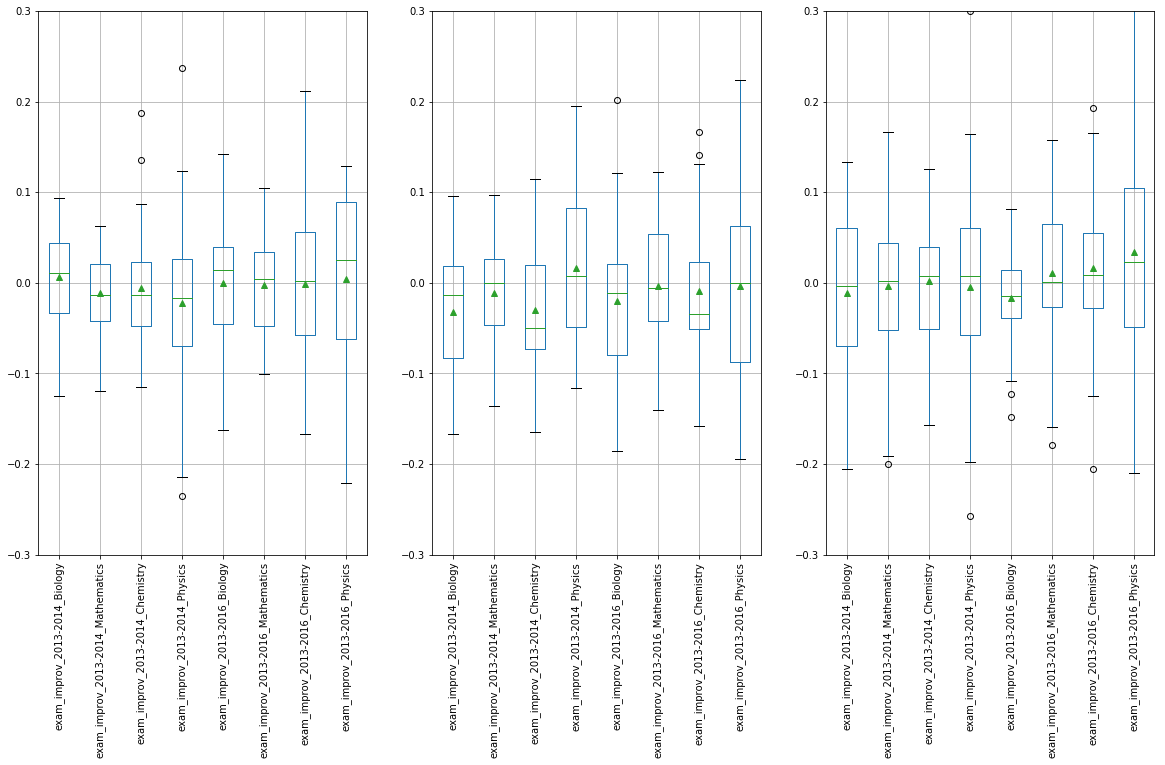

In [67]:
df_plot = df[df['categories'] == 'Active']

_, axs = plt.subplots(1,3,figsize=(20,10),sharey=True)

plt.subplot(1,3,1)
df_plot[df_plot['FSM_group']=='Low'].filter(regex='exam_improv').boxplot(rot=90, showmeans=True).set_ylim(-0.3,0.3)
plt.subplot(1,3,2)
df_plot[df_plot['FSM_group']=='Medium'].filter(regex='exam_improv').boxplot(rot=90, showmeans=True).set_ylim(-0.3,0.3)
plt.subplot(1,3,3)
df_plot[df_plot['FSM_group']=='High'].filter(regex='exam_improv').boxplot(rot=90, showmeans=True).set_ylim(-0.3,0.3)

print('Exam improvement between Low, Medium and High FSM groups of those that are active')